<a href="https://colab.research.google.com/github/AvinashSonawane01/Oasis_Infobyte_Internship/blob/main/Task_1/Internship_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name - Avinash Sonawane**

**Task 1 - Iris Flower Classification**

In [1]:
# Importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/Iris.csv")
print(df)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

In [5]:
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [6]:
df.tail(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
140,141,6.7,3.1,5.6,2.4,Iris-virginica
141,142,6.9,3.1,5.1,2.3,Iris-virginica
142,143,5.8,2.7,5.1,1.9,Iris-virginica
143,144,6.8,3.2,5.9,2.3,Iris-virginica
144,145,6.7,3.3,5.7,2.5,Iris-virginica
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
df.shape

(150, 6)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

Here in the dataset we have three types of Specied

So grouping the dataset by Species

In [4]:
# Here in the dataset we have three types of Specied
# So grouping the dataset by Species

data = df.groupby('Species')

In [11]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [12]:
print(data)

In [13]:
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [14]:
data.tail(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
40,41,5.0,3.5,1.3,0.3,Iris-setosa
41,42,4.5,2.3,1.3,0.3,Iris-setosa
42,43,4.4,3.2,1.3,0.2,Iris-setosa
43,44,5.0,3.5,1.6,0.6,Iris-setosa
44,45,5.1,3.8,1.9,0.4,Iris-setosa
45,46,4.8,3.0,1.4,0.3,Iris-setosa
46,47,5.1,3.8,1.6,0.2,Iris-setosa
47,48,4.6,3.2,1.4,0.2,Iris-setosa
48,49,5.3,3.7,1.5,0.2,Iris-setosa
49,50,5.0,3.3,1.4,0.2,Iris-setosa


Visualizing the Dataset


{'whiskers': [<matplotlib.lines.Line2D at 0x7fd8052f2160>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd8052f2700>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd8052d8e50>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd8052f2ca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd8052f2f70>],
 'means': []}

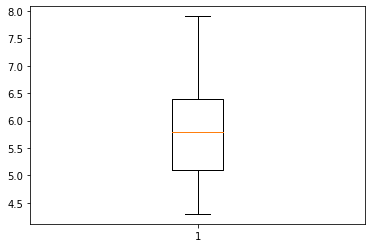

In [17]:
plt.boxplot(df['SepalLengthCm'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd8029dd940>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd8029dddc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd8029dd670>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd8029e73a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd8029e7670>],
 'means': []}

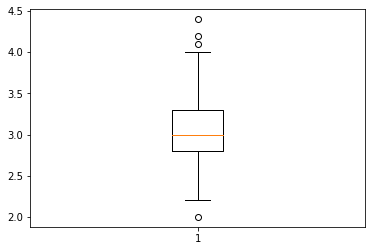

In [18]:
plt.boxplot(df['SepalWidthCm'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd8029c1fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd8029d5490>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd8029c1d60>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd8029d5a60>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd8029d5d00>],
 'means': []}

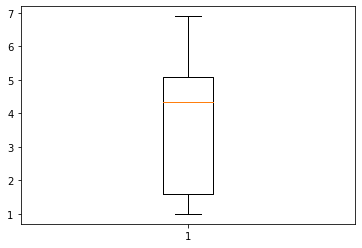

In [19]:
plt.boxplot(df['PetalLengthCm'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd80292bd00>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd80293e1c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd80292b3d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd80293e790>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd80293ea30>],
 'means': []}

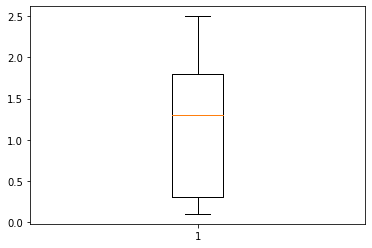

In [20]:
plt.boxplot(df['PetalWidthCm'])

<AxesSubplot:>

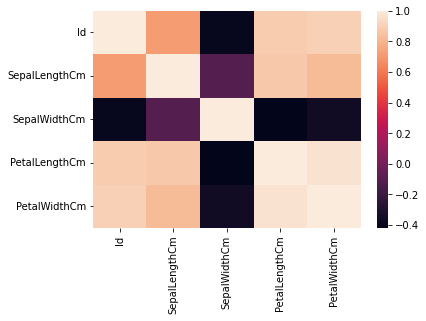

In [21]:
sns.heatmap(df.corr())

Data Preparation

In [5]:
df.drop('Id',axis = 1,inplace = True)

In [6]:
sp = {'Iris-setosa':1,'Iris-versicolor':2,'Iris-virginica':3}

In [7]:
df.Species = [sp[i] for i in df.Species]

In [8]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


In [9]:
x = df.iloc[:,0:4]

In [29]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [30]:
y = df.iloc[:,4]

In [31]:
y

0      1
1      1
2      1
3      1
4      1
      ..
145    3
146    3
147    3
148    3
149    3
Name: Species, Length: 150, dtype: int64

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

**Traning** **Model**

In [35]:
model = LinearRegression()

In [36]:
model.fit(x,y)

LinearRegression()

In [37]:
model.score(x,y)

0.9304223675331595

In [38]:
model.coef_

array([-0.10974146, -0.04424045,  0.22700138,  0.60989412])

In [39]:
model.intercept_

1.192083994828139

**Making Predictions**

In [41]:
y_pred = model.predict(x_test)

**Model Evolution**

In [42]:
print("Mean squared error: %.2f" % np.mean((y_pred - y_test) ** 2))

Mean squared error: 0.04
